In [0]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#### Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [0]:
RE_DF = pd.read_csv('/content/drive/My Drive/AIML_Training/ratings_Electronics.csv',names=['userId', 'productId', 'ratings','timestamp'])

In [0]:
RE_DF.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
RE_DF.shape

(7824482, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb4fe31278>,
      dtype=object)

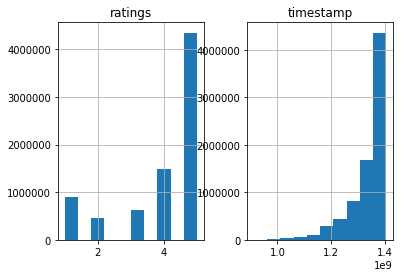

In [6]:
RE_DF.hist()

In [0]:
#### Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )


In [0]:
RE_DF = RE_DF.drop('timestamp', axis=1)

In [0]:
RE_DF_count = RE_DF['userId'].value_counts()
RE_DF_result = RE_DF[RE_DF['userId'].isin(RE_DF_count[RE_DF_count >= 50].index)]

In [9]:
print('No of user above 50 ratings:', len(RE_DF_result))


No of user above 50 ratings: 125871


In [10]:
print('Number distinct user:', RE_DF_result['userId'].nunique())


Number distinct user: 1540


In [11]:
print('Number of distinct products: ', RE_DF_result['productId'].nunique())

Number of distinct products:  48190


#### Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib


In [28]:
train_data, test_data = train_test_split(RE_DF, test_size = 0.30, random_state=0)
print(train_data.head(5))

                 userId   productId  ratings
5258360  A1H898ODS23YBE  B0060I17XA      5.0
4191577  A3OATVQ0ZPA0O9  B004J3Y9U6      3.0
5574835  A10F3XNIDFZK08  B0073HSHVM      3.0
1619920   AOEAD7DPLZE53  B0012W7HQK      5.0
424298   A2T5K3LO6TQMQW  B00022OBOM      4.0


In [30]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,0439886341,3
1,0511189877,4
2,0528881469,20
3,0558835155,1
4,059400232X,3


#### Build Popularity Recommender model.

In [31]:
#Sort the products on recommendation score 
train_data_1 = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_1['Rank'] = train_data_1['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recom = train_data_1.head(5) 
popularity_recom 

,productId,score,Rank
271590,B0074BW614,12730,1.0
375363,B00DR0PDNE,11499,2.0
287933,B007WTAJTO,9994,3.0
261254,B006GWO5WK,8567,4.0
91788,B0019EHU8G,8547,5.0


In [0]:
users = RE_DF['userId'].unique()

In [0]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recom = popularity_recom 
          
    #Add user_id column for which the recommendations are being generated 
    user_recom['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recom.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recom = user_recom[cols] 
          
    return user_recom 

In [35]:
find_recom = [10,125,200]   # This list will be user choice.
for i in find_recom:
    print("Recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Recommendation for the userId: 10

        userId   productId  score  Rank
271590      10  B0074BW614  12730   1.0
375363      10  B00DR0PDNE  11499   2.0
287933      10  B007WTAJTO   9994   3.0
261254      10  B006GWO5WK   8567   4.0
91788       10  B0019EHU8G   8547   5.0


Recommendation for the userId: 125

        userId   productId  score  Rank
271590     125  B0074BW614  12730   1.0
375363     125  B00DR0PDNE  11499   2.0
287933     125  B007WTAJTO   9994   3.0
261254     125  B006GWO5WK   8567   4.0
91788      125  B0019EHU8G   8547   5.0


Recommendation for the userId: 200

        userId   productId  score  Rank
271590     200  B0074BW614  12730   1.0
375363     200  B00DR0PDNE  11499   2.0
287933     200  B007WTAJTO   9994   3.0
261254     200  B006GWO5WK   8567   4.0
91788      200  B0019EHU8G   8547   5.0




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Build Collaborative Filtering model.

In [36]:
df_collaborative_F = pd.concat([train_data, test_data]).reset_index()
df_collaborative_F.tail()

,index,userId,productId,ratings
7824477,6241487,AW2BYVGYR57O,B008HY8XTG,5.0
7824478,4356226,A35456I12N9KHW,B004Q81CKY,5.0
7824479,7333376,A2PJZ8FGZC48YG,B00CYZYKXW,4.0
7824480,2613787,A39CX70TRCL3KM,B002HWRJBM,5.0
7824481,808854,A1MT815819FZC5,B000CP4K8Q,2.0


In [64]:
df_collaborative_F.shape

(7824482, 4)

In [0]:
df_collaborative_F1 = df_collaborative_F.sample(1000)

In [62]:
#User-based Collaborative Filtering:

pivot_df = df_collaborative_F1.pivot_table(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
print(pivot_df.shape)
pivot_df.head()


(1000, 958)


productId,B00001P4ZH,B0000222MY,B00004TBA5,B00004TF4V,B00004VX3T,B00004WCGF,B00004WCID,B00004Y2N4,B00004YZQ8,B000050MJH,B0000510VL,B0000511XC,B00005137P,B00005ARK3,B00005ATMI,B00005AWCL,B00005ML7Q,B00005QVL0,B00005S8KM,B00005T3DP,B0000632FZ,B000067RJB,B000067V62,B000068P8W,B00006B0QF,B00006HYPV,B00006HZ0K,B00006I5VX,B00006JI5H,B00007FGUF,B00007M1TZ,B000092YOU,B000097O5F,B00009LZMN,B00009R6WU,B00009R8NG,B00009R8ZW,B00009U0XI,B00009XVCZ,B00009ZY55,...,B00DR92KTU,B00DSI8J3G,B00DY3J8VM,B00E055H5O,B00E19H9U0,B00E362W9O,B00E3W15P0,B00E4B82RE,B00E8CIGCU,B00EEOSZK0,B00EOYW5RE,B00EPIWWEA,B00ESG5TQM,B00ET9YYS2,B00EVTQGOU,B00EXCRPPO,B00EXUG8BS,B00F0SLKO2,B00FAMAQQG,B00FB1TBKS,B00FB45SI4,B00FDXLRM4,B00FFJ2X4W,B00FG5DOV6,B00GKKI4JI,B00GNIR7WW,B00GOILYB6,B00GTAB0X6,B00GTGSU6A,B00H2C5SYM,B00HGE3CZS,B00HKEI3I0,B00HPQMO2Y,B00HVLUR86,B00I1781BY,B00I1A77CU,B00ICCX2EE,B00IDCQOJ8,B00IYCXD9G,B00JEXBO6I
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A07891183SE24FCJFJ3PC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1061WY72V5XKH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1071G759QFOZK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A107BRWBRASM9L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10DOBNH1XIP9S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,B00001P4ZH,B0000222MY,B00004TBA5,B00004TF4V,B00004VX3T,B00004WCGF,B00004WCID,B00004Y2N4,B00004YZQ8,B000050MJH,B0000510VL,B0000511XC,B00005137P,B00005ARK3,B00005ATMI,B00005AWCL,B00005ML7Q,B00005QVL0,B00005S8KM,B00005T3DP,B0000632FZ,B000067RJB,B000067V62,B000068P8W,B00006B0QF,B00006HYPV,B00006HZ0K,B00006I5VX,B00006JI5H,B00007FGUF,B00007M1TZ,B000092YOU,B000097O5F,B00009LZMN,B00009R6WU,B00009R8NG,B00009R8ZW,B00009U0XI,B00009XVCZ,B00009ZY55,...,B00DSI8J3G,B00DY3J8VM,B00E055H5O,B00E19H9U0,B00E362W9O,B00E3W15P0,B00E4B82RE,B00E8CIGCU,B00EEOSZK0,B00EOYW5RE,B00EPIWWEA,B00ESG5TQM,B00ET9YYS2,B00EVTQGOU,B00EXCRPPO,B00EXUG8BS,B00F0SLKO2,B00FAMAQQG,B00FB1TBKS,B00FB45SI4,B00FDXLRM4,B00FFJ2X4W,B00FG5DOV6,B00GKKI4JI,B00GNIR7WW,B00GOILYB6,B00GTAB0X6,B00GTGSU6A,B00H2C5SYM,B00HGE3CZS,B00HKEI3I0,B00HPQMO2Y,B00HVLUR86,B00I1781BY,B00I1A77CU,B00ICCX2EE,B00IDCQOJ8,B00IYCXD9G,B00JEXBO6I,user_index
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A07891183SE24FCJFJ3PC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A1061WY72V5XKH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A1071G759QFOZK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A107BRWBRASM9L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10DOBNH1XIP9S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [59]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

productId,B00001P4ZH,B0000222MY,B00004TBA5,B00004TF4V,B00004VX3T,B00004WCGF,B00004WCID,B00004Y2N4,B00004YZQ8,B000050MJH,B0000510VL,B0000511XC,B00005137P,B00005ARK3,B00005ATMI,B00005AWCL,B00005ML7Q,B00005QVL0,B00005S8KM,B00005T3DP,B0000632FZ,B000067RJB,B000067V62,B000068P8W,B00006B0QF,B00006HYPV,B00006HZ0K,B00006I5VX,B00006JI5H,B00007FGUF,B00007M1TZ,B000092YOU,B000097O5F,B00009LZMN,B00009R6WU,B00009R8NG,B00009R8ZW,B00009U0XI,B00009XVCZ,B00009ZY55,...,B00DR92KTU,B00DSI8J3G,B00DY3J8VM,B00E055H5O,B00E19H9U0,B00E362W9O,B00E3W15P0,B00E4B82RE,B00E8CIGCU,B00EEOSZK0,B00EOYW5RE,B00EPIWWEA,B00ESG5TQM,B00ET9YYS2,B00EVTQGOU,B00EXCRPPO,B00EXUG8BS,B00F0SLKO2,B00FAMAQQG,B00FB1TBKS,B00FB45SI4,B00FDXLRM4,B00FFJ2X4W,B00FG5DOV6,B00GKKI4JI,B00GNIR7WW,B00GOILYB6,B00GTAB0X6,B00GTGSU6A,B00H2C5SYM,B00HGE3CZS,B00HKEI3I0,B00HPQMO2Y,B00HVLUR86,B00I1781BY,B00I1A77CU,B00ICCX2EE,B00IDCQOJ8,B00IYCXD9G,B00JEXBO6I
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 5)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

sigma

array([[ 7.07106781,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  7.07106781,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  8.66025404,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  8.66025404,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 10.        ]])